## 작업형 제 2 유형

### ✏️ 차량의 특징 기반 데이터를 활용해 test 데이터의 중고차 가격을 예측하시오.
- 제공된 데이터 목록 : train.csv, test.csv
- 예측할 컬럼 : price(차량 가격)
- 학습용 데이터(train.csv)를 이용하여 차량 가격을 예측하는 모델을 만든 후 이를 평가용 데이터(test.csv)에 적용해 얻은 예측값을 다음과 같은 형식의 csv 파일로 생성하시오.
    - 제출 파일은 다음 1개의 컬럼을 포함해야 한다
        - pred : 예측된 차량 가격
        - 제출 파일명 : result.csv
    - 제출한 모델의 성능은 RMSE(Root Mean Square Error) 평가지표에 따라 채점한다

In [1]:
# 1. 문제 정의
## 자동차 데이터, 차량의 특징을 기반으로 가격(price) 에측

# 2. 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

(3759, 9) (1617, 8) 

       model  year  price transmission  mileage fuelType  tax   mpg  \
0   EcoSport  2017  10298       Manual    25013   Petrol  150  53.3   
1      Focus  2016  10491       Manual    30970   Diesel    0  74.3   
2      S-MAX  2017  13498       Manual    60200   Diesel  150  56.5   

   engineSize  
0         1.0  
1         1.5  
2         2.0   

     model  year transmission  mileage fuelType  tax   mpg  engineSize
0    S-MAX  2016       Manual    23905   Diesel  125  56.5         2.0
1   Fiesta  2018       Manual    16895   Petrol  145  40.3         1.5
2     Kuga  2017       Manual    12109   Petrol  165  45.6         1.5 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3759 non-null   object 
 1   year          3759 non-null   int64  
 2   price         3759 non-null   int64  
 3   transmission  3

<Axes: >

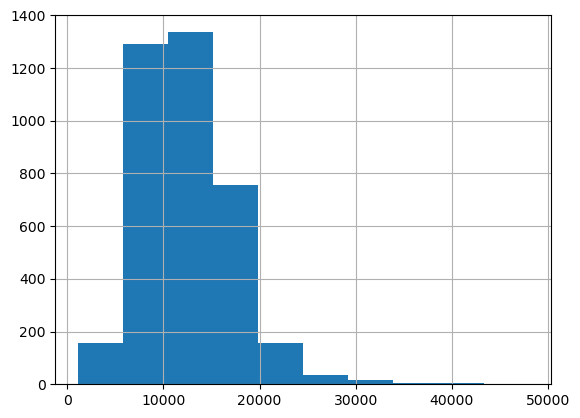

In [2]:
# 3. 탐색적 데이터 분석(EDA)
## 데이터 크기
print(train.shape, test.shape, '\n')

## 데이터 샘플
print(train.head(3), '\n')
print(test.head(3), '\n')

## 데이터 자료형(타입)
print(train.info(), '\n')

## 기초통계량
print(train.describe(), '\n')

## object 자료형의 unique 개수
print(train.describe(include='object'), '\n')
print(test.describe(include='object'), '\n')

## 결측치 확인
print(train.isnull().sum().sum(), '\n')
print(test.isnull().sum().sum(), '\n')

## 회귀의 경우 label(target) 이 연속형 -> 시험환경에서는 지원하지 않지만 보통 시각화로 확인(시험에서는 describe() 활용)
## 분류와 회귀를 구분하기 어렵다면 value_counts() 확인해서 수백, 수천개가 나온다면 회귀로 판단
print(train['price'].value_counts())    # 종류가 1,443개로 회귀

## 금액(x축)rhk tnfid(y축)을 히스토그램(histogram)으로 표현시
train['price'].hist()

In [3]:
# 4. 데이터 전처리
## 자료형이 object 인 컬럼을 원-핫 인코딩
target = train.pop('price')
print(train.shape, test.shape)

train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train.shape, test.shape)

(3759, 8) (1617, 8)
(3759, 30) (1617, 30)


In [4]:
# 5. 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3007, 30) (752, 30) (3007,) (752,)


In [ ]:
# 6. 머신러닝 학습 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error as rmse    # RMSE 는 0 에 가까울수록(오차가 작을수록) 좋은 모델
# from sklearn.metrics import mean_squared_error
# def rmse(y_true, y_pred):
#     return mean_squared_error(y_true, y_pred)**0.5

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)        # 회귀는 predict() 로만 예측 -> 선형 회귀 모델은 random_state 하이퍼파라미터가 없기 때문
print('선형회귀 :', rmse(y_val, pred))

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_val)
print('의사결정 나무 :', rmse(y_val, pred))

xg = xgb.XGBRegressor(random_state=0)
xg.fit(X_train, y_train)
pred = xg.predict(X_val)
print('xgboost :', rmse(y_val, pred))

lg = lgb.LGBMRegressor(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_val)
print("lightGBM :", rmse(y_val, pred))  # 채택

선형회귀 : 1862.2289379589952
의사결정 나무 : 1740.134515580284
xgboost : 1248.9714752111672
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 3007, number of used features: 23
[LightGBM] [Info] Start training from score 12376.855670
lightGBM : 1215.0352179520182


In [14]:
# 7. 예측 및 결과 파일 생성
pred = lg.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv('result.csv', index=False)

print(pd.read_csv('result.csv').head())

           pred
0  15444.186657
1  16243.305415
2  14824.701166
3  17696.309227
4   6466.907953


In [ ]:
# 8-1. 성능 개선(인코딩)
## 개선 전 원-핫 인코딩 : 1215.0352179520182

# 데이터 불러오기
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# target 데이터
target = train.pop('price')

# 레이블 인코딩 : 1188.060473375616 이므로 채택
from sklearn.preprocessing import LabelEncoder
cols = train.select_dtypes(include='object').columns
for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# LightGBM
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error as rmse
lg = lgb.LGBMRegressor(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_val)
print(rmse(y_val, pred))

(3007, 8) (752, 8) (3007,) (752,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 3007, number of used features: 8
[LightGBM] [Info] Start training from score 12376.855670
1188.060473375616


In [19]:
# 8-1. 성능 개선(스케일링)
## 개선 전 : 1188.060473375616

# 데이터 불러오기
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# target 데이터
target = train.pop('price')

# 스케일링
from sklearn.preprocessing import StandardScaler    # 1179.0503419148163 채택
from sklearn.preprocessing import MinMaxScaler      # 1191.8980221017785
from sklearn.preprocessing import RobustScaler      # 1184.825002211304
scaler = StandardScaler()
cols = train.select_dtypes(exclude='object').columns
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
cols = train.select_dtypes(include='object').columns
for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# 검증데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# LightGBM
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error as rmse
lg = lgb.LGBMRegressor(random_state=0)
lg.fit(X_train, y_train)
pred = lg.predict(X_val)
print(rmse(y_val, pred))

(3007, 8) (752, 8) (3007,) (752,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 3007, number of used features: 8
[LightGBM] [Info] Start training from score 12376.855670
1179.0503419148163


In [20]:
# 9. 최종 제출 파일
pred = lg.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv('result.csv', index=False)

print(pd.read_csv('result.csv').head())

           pred
0  15803.107051
1  16160.938495
2  14671.224199
3  17965.979146
4   6295.859066
